# Leanding club Case Study

**Problem Statement**

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based\ on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company \

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company \


The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher \


**Business Objectives:**

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. \\

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. \\

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study. \

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. interest rate,etc.



In [515]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [516]:
#loading loan dataset
loandf=pd.read_csv("loan.csv")

In [517]:
## Data Inspection

loandf.shape

(39717, 111)

Fix rows and columns

In [518]:

# Calculating null value percentage in column
pd.set_option('display.max_rows', 200)
100*loandf.isnull().mean()

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.585543
purpose                             0.000000
title                               0.027696
zip_code  

In [519]:
#Fix rows and columns
# Removing unnecessary column which has maximum number of null values 

loandf.drop(["mths_since_last_delinq","mths_since_last_record","desc","next_pymnt_d","mths_since_last_major_derog","annual_inc_joint","dti_joint","verification_status_joint","tot_coll_amt","tot_cur_bal","open_acc_6m","open_il_6m","open_il_12m","open_il_24m","mths_since_rcnt_il","total_bal_il","il_util","open_rv_12m","open_rv_24m","max_bal_bc","all_util","total_rev_hi_lim","inq_fi","total_cu_tl","inq_last_12m","acc_open_past_24mths","avg_cur_bal","bc_open_to_buy","bc_util","mo_sin_old_il_acct","mo_sin_old_rev_tl_op","mo_sin_rcnt_rev_tl_op","mo_sin_rcnt_tl","mort_acc","mths_since_recent_bc","mths_since_recent_bc_dlq","mths_since_recent_inq","mths_since_recent_revol_delinq","num_accts_ever_120_pd","num_actv_bc_tl","num_actv_rev_tl","num_bc_sats","num_bc_tl","num_il_tl","num_op_rev_tl","num_rev_accts","num_rev_tl_bal_gt_0","num_sats","num_tl_120dpd_2m","num_tl_30dpd","num_tl_90g_dpd_24m","num_tl_op_past_12m","pct_tl_nvr_dlq","percent_bc_gt_75","tot_hi_cred_lim","total_bal_ex_mort","total_bc_limit","total_il_high_credit_limit"


],inplace=True,axis=1)


In [520]:
loandf.shape

(39717, 53)

In [521]:
# exploring Object data type column with repeatative value more than 30% or 11915
pd.set_option('display.max_columns', None) # Extending column limit
loandf.describe(include='O')

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
count,39717,39717,39717,39717,37258,38642,39717,39717,39717,39717,39717,39717,39717,39706,39717,39717,39717,39667,39717,39646,39715,39717
unique,2,371,7,35,28820,11,5,3,55,3,1,39717,14,19614,823,50,443,1089,1,12,12,1
top,36 months,10.99%,B,B3,US Army,10+ years,RENT,Not Verified,11-Dec,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt Consolidation,100xx,CA,Oct-24,0%,f,May-24,May-24,INDIVIDUAL
freq,29096,956,12020,2917,134,8879,18899,16921,2260,32950,39717,1,18641,2184,597,7099,1348,977,39717,4285,12231,39717


In [522]:
# dropping columns where repeatative value present more than 30% or 11915 or Not having any meaningfull data
loandf.drop(["pymnt_plan","initial_list_status","application_type"],inplace=True,axis=1)

In [523]:
loandf.shape

(39717, 50)

In [524]:
# Identifying columns where repeatative value more than 50% 
loandf.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [525]:
loandf

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,11-Dec,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-24,171.62,May-24,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-24,119.66,Sep-24,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,11-Dec,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-24,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-24,649.91,May-24,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-24,357.48,Apr-24,0.0,1,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,11-Dec,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-24,67.79,May-24,0.0,1,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,7-Jul,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,13,0,7274,13.10%,40,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-24,80.90,Jun-24,NaN,1,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,7-Jul,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,6,0,8847,26.90%,9,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-24,281.94,Jul-24,NaN,1,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,7-Jul,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,11,0,9698,19.40%,20,0.00,0.00,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-24,0.00,Jun-24,NaN,1,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,7-Jul,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,17,0,85607,0.70%,26,0.00,0.00,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-24,0.00,Jun-24,NaN,1,0,NaN,0,NaN,

In [526]:
#Dropping column where almost all values are identical as we cant draw meaningfull insight out of it
loandf.drop(["url","sub_grade","zip_code","addr_state","tax_liens","pub_rec_bankruptcies","delinq_amnt","chargeoff_within_12_mths","acc_now_delinq","policy_code","collections_12_mths_ex_med","out_prncp_inv","out_prncp","pub_rec"],inplace=True,axis=1)

In [527]:
# Counting columns 
loandf.shape

(39717, 36)

In [528]:
# checking columns with null value
# As per previous observation  emp_title,emp_length,title,revol_util,last_pymnt_d,last_credit_pull_d  has minor number of                                                          

100*loandf[["emp_title","emp_length","title","revol_util","last_pymnt_d","last_credit_pull_d"]].isnull().mean()

emp_title             6.191303
emp_length            2.706650
title                 0.027696
revol_util            0.125891
last_pymnt_d          0.178765
last_credit_pull_d    0.005036
dtype: float64

In [529]:
##Cleaning all null value   
df=loandf[~(loandf["emp_title"].isnull() | loandf["emp_length"].isnull() | loandf["title"].isnull() | loandf["revol_util"].isnull() | loandf["last_pymnt_d"].isnull() | loandf["last_credit_pull_d"].isnull())]

In [530]:
loandf.shape

(39717, 36)

In [531]:
#Checking null value status after removal
100*df.isnull().mean()

id                         0.0
member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
emp_title                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
title                      0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_rec_prncp            0.0
total_rec_int              0.0
total_rec_late_fee         0.0
recoveries                 0.0
collecti

In [532]:
#Exploring dataset
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,11-Dec,Charged Off,car,bike,1.00,0,Apr-99,5,3,1687,9.40%,4,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-24,119.66,Sep-24
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,11-Dec,Fully Paid,other,personel,20.00,0,Feb-96,1,10,5598,21%,37,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-24,357.48,Apr-24
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,University Medical Group,1 year,RENT,80000.0,Source Verified,11-Dec,Current,other,Personal,17.94,0,Jan-96,0,15,27783,53.90%,38,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-24,67.79,May-24
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,11-Dec,Fully Paid,wedding,My wedding loan I promise to pay back,11.20,0,Nov-24,3,9,7963,28.30%,12,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-24,161.03,Jan-24
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,Southern Star Photography,8 years,RENT,47004.0,Not Verified,11-Dec,Fully Paid,debt_consolidation,Loan,23.51,0,Jul-24,1,7,17726,85.60%,11,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-24,1313.76,May-24


Formatting columns:

In [533]:
# Removing percentile symbol and other unwanted format
df["int_rate"]=df["int_rate"].str.replace('%','')
df["revol_util"]=df["revol_util"].str.replace('%','')
df["emp_length"]=df["emp_length"].str.replace(' years','')
df["emp_length"]=df["emp_length"].str.replace(' year','')
df["emp_length"]=df["emp_length"].str.replace('+','')
df["emp_length"]=df["emp_length"].str.replace('< ','')


In [534]:
# converting data type 
df["int_rate"]=df["int_rate"].astype(float)
df["revol_util"]=df["revol_util"].astype(float)
df["emp_length"]=df["emp_length"].astype(int)

In [535]:
#Converting columns to date time data type
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'],format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'],format='%b-%y')
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'],format='%b-%y')
 


**Outlier Analysis**

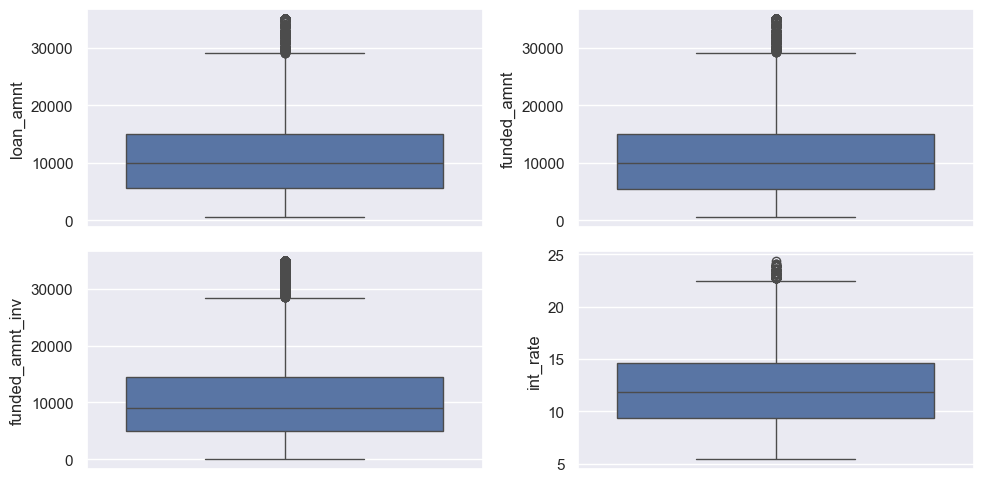

In [536]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(df['loan_amnt'], ax = axs[0,0])
plt2 = sns.boxplot(df['funded_amnt'], ax = axs[0,1])
plt3 = sns.boxplot(df['funded_amnt_inv'], ax = axs[1,0])
plt4 = sns.boxplot(df['int_rate'], ax = axs[1,1])
plt.tight_layout()

In [537]:
# Outlier Removal
#Removing loan_amnt > 30000
#funded_amnt_inv  > 30000
# funded_amnt_inv > 30000
tempdf1=df[~(df["funded_amnt"] > 30000)]
tempdf2=tempdf1[~(tempdf1["funded_amnt_inv"] > 30000)]
tempdf3=tempdf2[~(tempdf2["funded_amnt_inv"] > 30000 )]


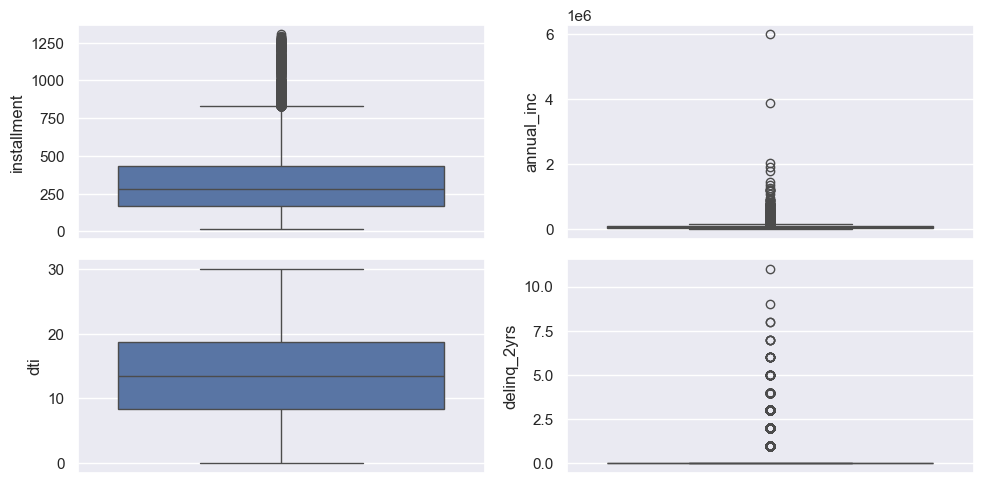

In [538]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt5 = sns.boxplot(df['installment'], ax = axs[0,0])
plt6 = sns.boxplot(df['annual_inc'], ax = axs[0,1])
plt7 = sns.boxplot(df['dti'], ax = axs[1,0])
plt8 = sns.boxplot(df['delinq_2yrs'], ax = axs[1,1])
plt.tight_layout()

In [539]:
# Removing Outlier for below columns 
#annual_inc > 1000000
#installment > 800
tempdf4=tempdf3[~(tempdf3["annual_inc"] > 1000000)]
tempdf5=tempdf4[~(tempdf4["installment"] > 800 )]

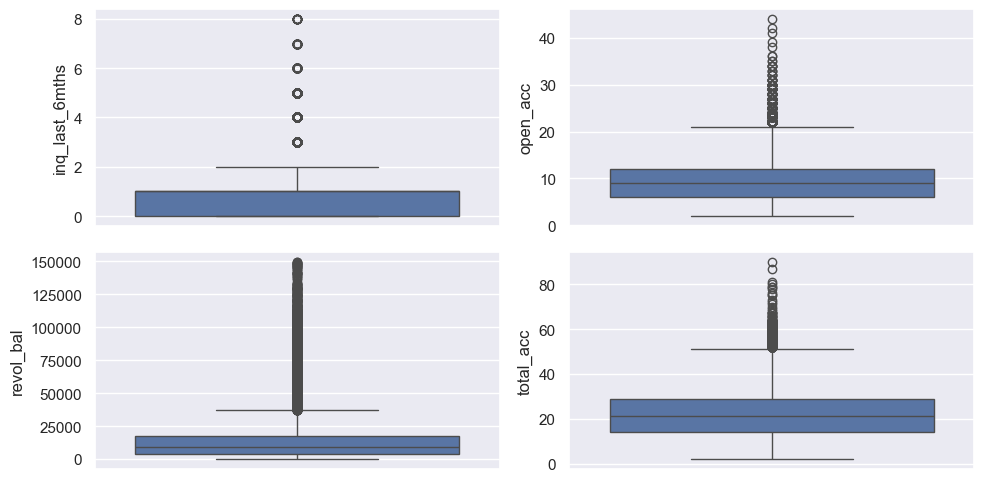

In [540]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt9 = sns.boxplot(df['inq_last_6mths'], ax = axs[0,0])
plt10 = sns.boxplot(df['open_acc'], ax = axs[0,1])
plt11 = sns.boxplot(df['revol_bal'], ax = axs[1,0])
plt12 = sns.boxplot(df['total_acc'], ax = axs[1,1])
plt.tight_layout()

In [541]:
# Removing Outlier for below columns 
#inq_last_6mths > 4
#open_acc > 25
#revol_bal > 60000
#total_acc > 60

tempdf6=tempdf5[~(tempdf5["inq_last_6mths"] > 4)]
tempdf7=tempdf6[~(tempdf6["open_acc"] > 25)]
tempdf8=tempdf7[~(tempdf7["revol_bal"] > 60000)]
tempdf9 = tempdf8[~(tempdf8["total_acc"] > 60)]


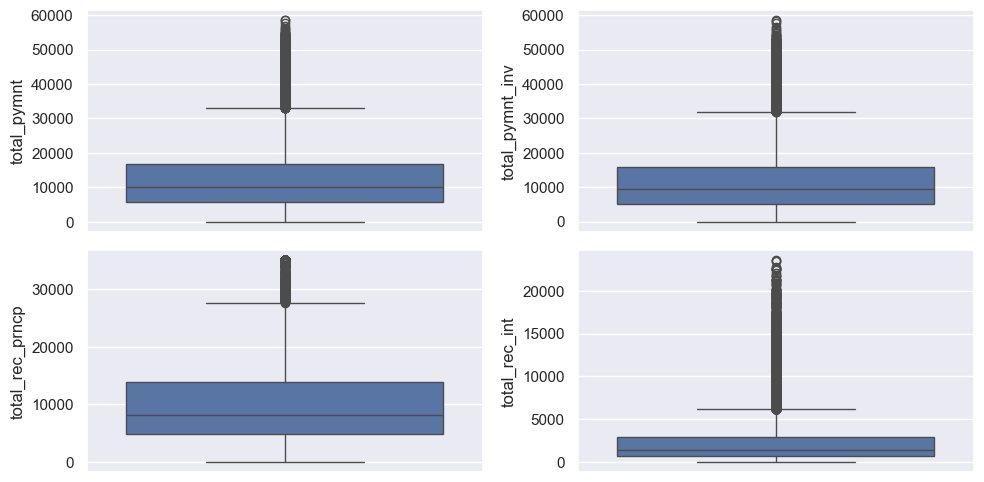

In [542]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt13 = sns.boxplot(df['total_pymnt'], ax = axs[0,0])
plt14 = sns.boxplot(df['total_pymnt_inv'], ax = axs[0,1])
plt15 = sns.boxplot(df['total_rec_prncp'], ax = axs[1,0])
plt16 = sns.boxplot(df['total_rec_int'], ax = axs[1,1])
plt.tight_layout()

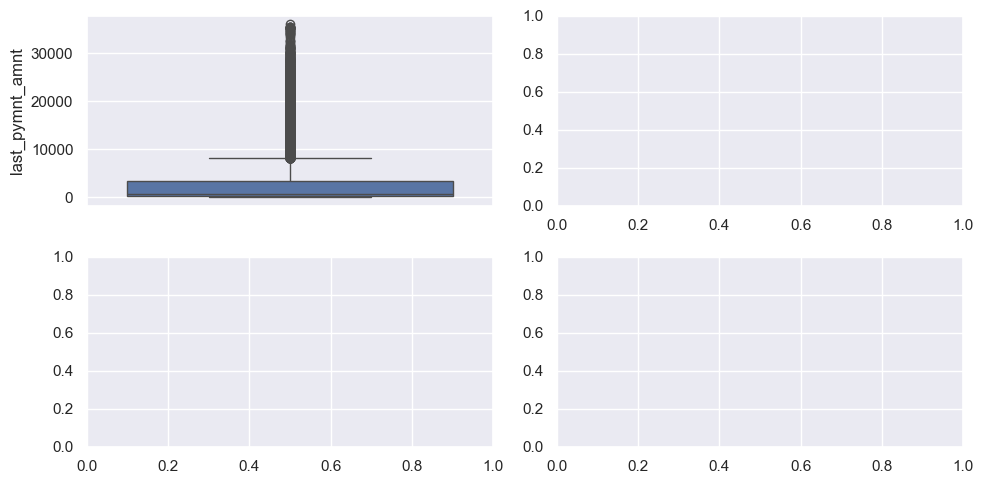

In [543]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt17 = sns.boxplot(df['last_pymnt_amnt'], ax = axs[0,0])
plt.tight_layout()

In [544]:
# Removing Outlier for below columns 
#total_pymnt > 40000
#total_pymnt_inv > 35000
#total_rec_prncp > 30000
#total_rec_int > 10000
#last_pymnt_amnt > 10000

tempdf10 = tempdf9[~(tempdf9["total_pymnt"] > 40000)]
tempdf11 = tempdf10[~(tempdf10["total_pymnt_inv"] > 35000)]
tempdf12 = tempdf11[~(tempdf11["total_rec_prncp"] > 30000)]
tempdf13 = tempdf12[~(tempdf12["total_rec_int"] > 10000)]
tempdf14 = tempdf13[~(tempdf13["last_pymnt_amnt"] > 10000)]

In [545]:
# Storing Final Dataset
finalloandf = tempdf14



In [546]:
finalloandf.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,11-Dec,Fully Paid,other,personel,20.00,0,1996-02-01,1,10,5598,21.0,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.0,2024-01-01,357.48,2024-04-01
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,University Medical Group,1,RENT,80000.0,Source Verified,11-Dec,Current,other,Personal,17.94,0,1996-01-01,0,15,27783,53.9,38,3513.330000,3513.33,2475.94,1037.39,0.00,0.0,0.0,2024-05-01,67.79,2024-05-01
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,Veolia Transportaton,3,RENT,36000.0,Source Verified,11-Dec,Fully Paid,wedding,My wedding loan I promise to pay back,11.20,0,2024-11-01,3,9,7963,28.3,12,5632.210000,5632.21,5000.00,632.21,0.00,0.0,0.0,2024-01-01,161.03,2024-01-01
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,Southern Star Photography,8,RENT,47004.0,Not Verified,11-Dec,Fully Paid,debt_consolidation,Loan,23.51,0,2024-07-01,1,7,17726,85.6,11,10110.840000,10110.84,6985.61,3125.23,0.00,0.0,0.0,2024-05-01,1313.76,2024-05-01
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,MKC Accounting,9,RENT,48000.0,Source Verified,11-Dec,Fully Paid,car,Car Downpayment,5.35,0,2024-01-01,2,4,8221,87.5,4,3939.135294,3939.14,3000.00,939.14,0.00,0.0,0.0,2024-01-01,111.34,2024-12-01


# Univariate analysis

**Objective:**

Understand the distribution and key statistics of a numerical variable.



**Questions:**

- What is the overall distribution of the numerical values?
- What are the key statistics (mean, median, mode, range, standard deviation)?


**Methods:**

- **Histogram:** Plot a histogram to visualize the distribution of numerical values.
- **Box Plot:** Use a box plot to identify outliers and understand the spread of values.



**OUTCOME**
- Based on Univariate analysis we get to know loan is most frequently distributed around $10000 amount loan issues normally between $5000 - $14000

<Axes: xlabel='loan_amnt', ylabel='Count'>

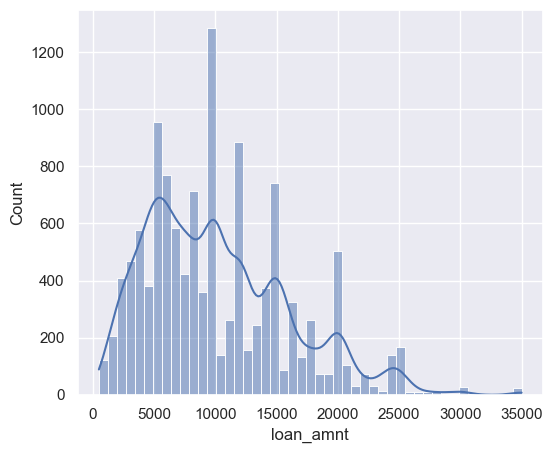

In [643]:
# Check distribution of loan
fig, axes = plt.subplots(1, 1, figsize=(6, 5))
sns.histplot(finalloandf,x="loan_amnt",kde=True,palette='coolwarm')

<Axes: xlabel='loan_amnt'>

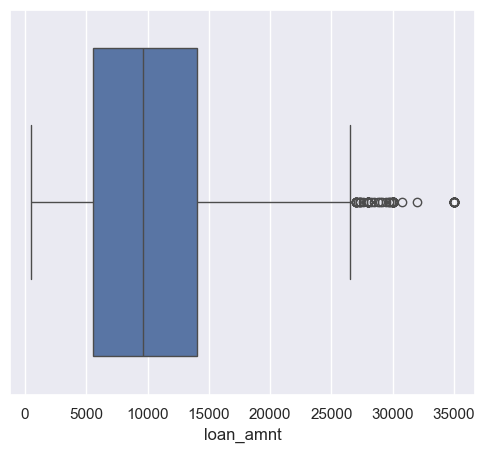

In [644]:
# Check distribution of loan
fig, axes = plt.subplots(1, 1, figsize=(6, 5))
sns.boxplot(finalloandf,x="loan_amnt")

# Univariate Analysis (Segmented)

AS Per Analysis I have came to below points:

**Findings from analysis:**

a. Recovery is strong indicator which tell us loan is charged off as current loan or fully paid loan dosent require recovery. 
   so using this to analyze other segments (FIG 7 on Subplot).

b. Recovery rate is high for customer who rent/ mortgage (FIG 3 on Subplot). \

c. Recovery rate is high where purpose is small business,Credit card,debt consolidation(FIG 8 on Subplot).\ 

d. Recovery rate is comparitively Low where loan grade is A,B,C and high where loan Grade is G,F,E,D. 
   This could be a strong indicator to decide on when loan are getting Charged off. (FIG 5 on Subplot)\ 
   
e. Loan provided at higher interest rate for in this sequence A,B,C,D,E,F,G ( FIG 6 on Subplot) \

f. As per analysis Company have given more loan to Risk category (FIG 1 on Subplot).


**Extra Analysis:**

1) Late fees received to date is significantly high for charged off customers.

2) Revolving line utilization rate is high for charged off customer.

3) last_payment_amount is very low for charged off customer. 


**Univariate Analysis Insights:**
1.	Recovery Indicator: Recovery is a strong indicator of a loan being charged off, as current or fully paid loans do not require recovery efforts.
2.	Recovery Rate by Housing Situation: Higher recovery rates are observed for customers who rent or have mortgages.
3.	Recovery Rate by Loan Purpose: Elevated recovery rates are associated with loans for small businesses, credit cards, and debt consolidation.
4.	Recovery Rate by Loan Grade: Recovery rates are lower for higher-grade loans (A, B, C) and higher for lower-grade loans (G, F, E, D), suggesting that lower-grade loans are more likely to be charged off.
5. Interest rate by Loan Grade: Loan provided at higher interest rate for in this sequence A,B,C,D,E,F,G
6.	Loan Distribution: The company has issued more loans to categories deemed riskier.



**We are trying to draw co-relation between below Data points**

**loan_status:** Current status of the loan \
**inq_last_6mths:** The number of inquiries in past 6 months (excluding auto and mortgage inquiries)\
**total_rec_late_fee:**  Late fees received to date\
**total_pymnt:** Payments received to date for total amount funded\
**revol_util:** Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.\
**funded_amnt:** The total amount committed to that loan at that point in time.\
**last_pymnt_amnt:** Last total payment amount received.\
**emp_length:** Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. \
**int_rate:** Interest Rate on the loan 

**recoveries:** post charge off gross recovery. \
**home_ownership:** The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER. \
**purpose:** A category provided by the borrower for the loan request. \

**verification_status:** Indicates if income was verified by LC, not verified, or if the income source was verified.\
**Grade:**  LC assigned loan grade.\
**loan_amnt:** The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

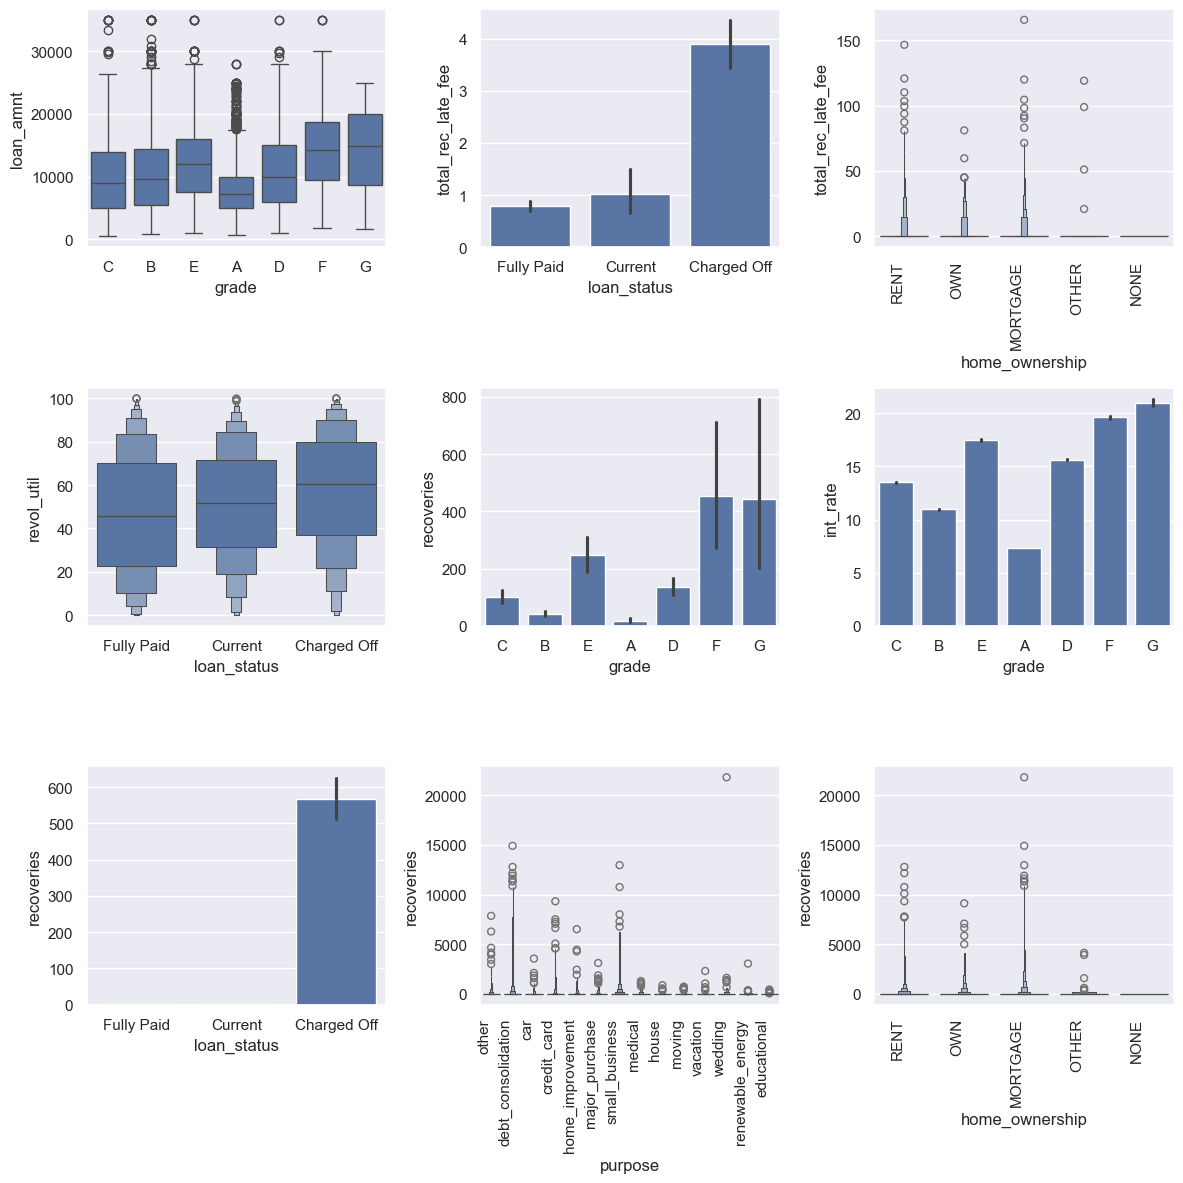

In [568]:
# Performing Univariate Analysis to find co-relation
fig, axs = plt.subplots(3,3, figsize = (12,12))
plt1 = sns.boxplot(x=finalloandf["grade"],y=finalloandf["loan_amnt"],ax = axs[0,0])
plt2 = sns.barplot(x=finalloandf["loan_status"],y=finalloandf["total_rec_late_fee"],ax = axs[0,1])
plt3 = sns.boxenplot(x=finalloandf["home_ownership"],y=finalloandf["total_rec_late_fee"],ax = axs[0,2])
plt3.set_xticklabels(plt3.get_xticklabels(), rotation=90, horizontalalignment='right')
plt4 = sns.boxenplot(x=finalloandf["loan_status"],y=finalloandf["revol_util"],ax = axs[1,0])
plt5 = sns.barplot(x=finalloandf["grade"],y=finalloandf["recoveries"],ax = axs[1,1])
plt6= sns.barplot(x=finalloandf["grade"],y=finalloandf["int_rate"],ax = axs[1,2])
plt7= sns.barplot(x=finalloandf["loan_status"],y=finalloandf["recoveries"],ax = axs[2,0])
plt8= sns.boxenplot(x=finalloandf["purpose"],y=finalloandf["recoveries"],ax = axs[2,1])
plt8.set_xticklabels(plt8.get_xticklabels(), rotation=90, horizontalalignment='right')
plt9= sns.boxenplot(x=finalloandf["home_ownership"],y=finalloandf["recoveries"],ax = axs[2,2])
plt9.set_xticklabels(plt9.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.tight_layout()

# Bivariate Analysis

**Findings from analysis:**

a. loan amount is positively co related to  Earliest credit line ,revol utilization ,anual income [Corelation chart].

b. Borrower with high revol_util more than 60 tends to charged off more. [FIG 8 on sub plot]

c. interest rate is positively related to revol_util [FIG 5 on sub plot].

d. interest rate is negetive to earliest credit line. [FIG 3 on sub plot]

e. Grade of loan is high where borrower's earliest reported credit line was opened is older or more than 10000 days. [FIG 6 on sub plot]

f. Charged off loan status has newer credit line less than was compared to Fully Paid and Current [FIG 9 on sub plot]

**Bivariate Analysis Insights:**
1.	Loan Amount Correlations: There is a positive correlation between loan amount and factors such as the earliest credit line, revolving utilization, and annual income.
2.	Revolving Utilization: High revolving utilization (over 60%) is linked to a higher likelihood of loan charge-offs.
3.	Interest Rate Correlations: Interest rates are positively correlated with revolving utilization but negatively with the age of the earliest credit line.
4.	Loan Grade and Credit Line Age: Higher loan grades are associated with older credit lines (over 10,000 days).
5.	Credit Line Age and Loan Status: Charged-off loans tend to have newer credit lines compared to loans that are fully paid or current.


**We are trying to draw co-relation between below Data points**

**loan_status:**        Current status of the loan \
**loan_amnt:**	        The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value. \
**revol_bal:**	        Total credit revolving balance.\
**earliest_cr_line:**	The month the borrower's earliest reported credit line was opened \
**annual_inc:**	        The self-reported annual income provided by the borrower during registration. \
**total_rec_late_fee:**  Late fees received to date\
**total_pymnt:**        Payments received to date for total amount funded\
**revol_util:**         Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.\
**funded_amnt:**        The total amount committed to that loan at that point in time.\
**last_pymnt_amnt:**    Last total payment amount received.\
**emp_length:**         Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. \
**int_rate:**           Interest Rate on the loan 
**recoveries:**         post charge off gross recovery. \
**home_ownership:**     The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER. \
**purpose:**            A category provided by the borrower for the loan request. \
**verification_status:** Indicates if income was verified by LC, not verified, or if the income source was verified.\
**Grade:**              LC assigned loan grade.

In [549]:
#Creating  some derived columns last_pymnt_d till today

finalloandf['last_pymnt_d_tilldate'] =pd.Timestamp.now().normalize() - finalloandf['last_pymnt_d']
finalloandf['last_pymnt_d_tilldate'] = finalloandf['last_pymnt_d_tilldate'].astype(str).apply(lambda x: x.replace(' days', ''))
finalloandf['last_pymnt_d_tilldate'] = finalloandf['last_pymnt_d_tilldate'].astype(int)



In [550]:
#Creating  some derived columns earliest_cr_line calculated tilldate 

finalloandf['earliest_cr_line_tilldate'] =pd.Timestamp.now().normalize() - finalloandf['earliest_cr_line']
finalloandf['earliest_cr_line_tilldate'] = finalloandf['earliest_cr_line_tilldate'].astype(str).apply(lambda x: x.replace(' days', ''))
finalloandf['earliest_cr_line_tilldate'] = finalloandf['earliest_cr_line_tilldate'].astype(int)



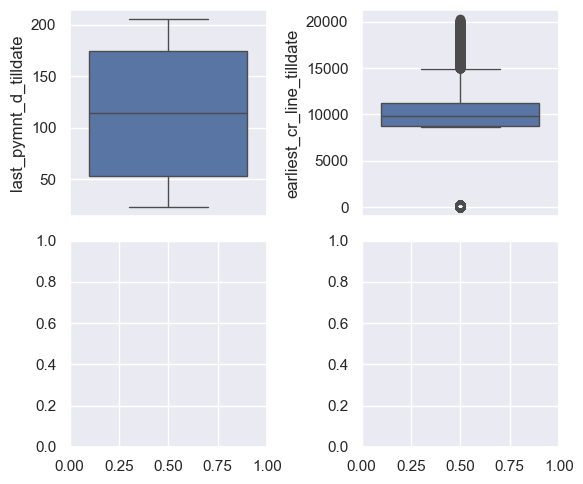

In [604]:
# Removing Outlier 

# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (6,5))
plt18 = sns.boxplot(finalloandf['last_pymnt_d_tilldate'], ax = axs[0,0])
plt19 = sns.boxplot(finalloandf['earliest_cr_line_tilldate'], ax = axs[0,1])
plt.tight_layout()

In [608]:
#Removing outliers
finalloandf = finalloandf[finalloandf['earliest_cr_line_tilldate'] < 15000]
finalloandf = finalloandf[finalloandf['earliest_cr_line_tilldate'] > 6000]

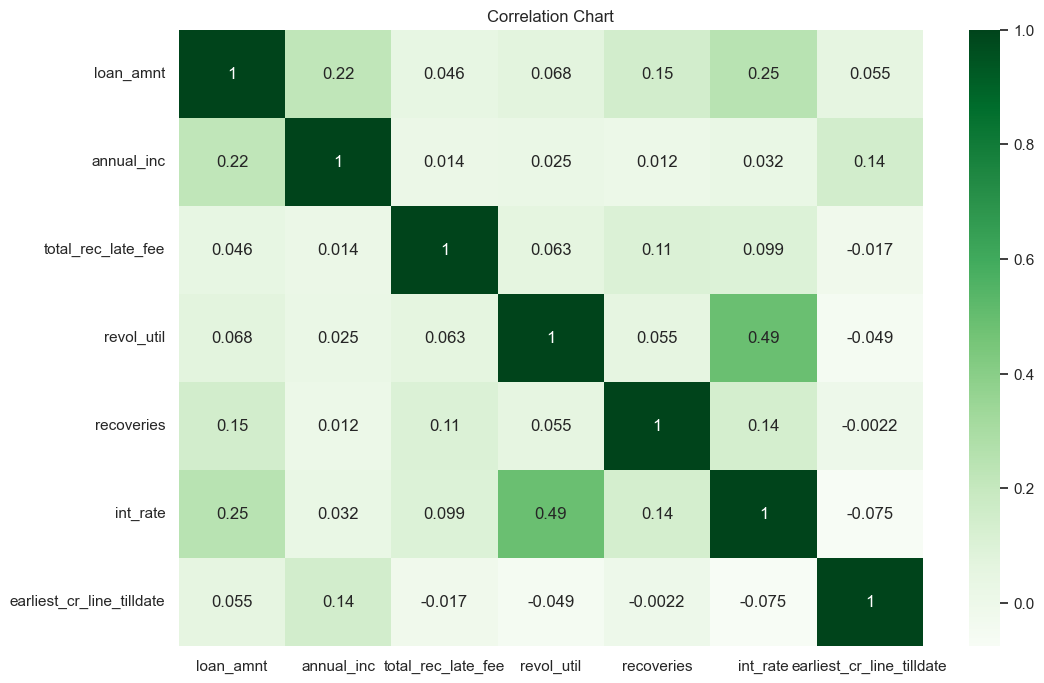

In [611]:
# Creating co-relation metrics for below numeric variabls.
corr=finalloandf[["loan_amnt","annual_inc","total_rec_late_fee","revol_util","recoveries","int_rate","earliest_cr_line_tilldate"]].corr() 
ax=sns.heatmap(corr,cmap = "Greens", annot=True)
ax.set_title("Correlation Chart")
sns.set(rc = {'figure.figsize':(12,12)})
plt.show()

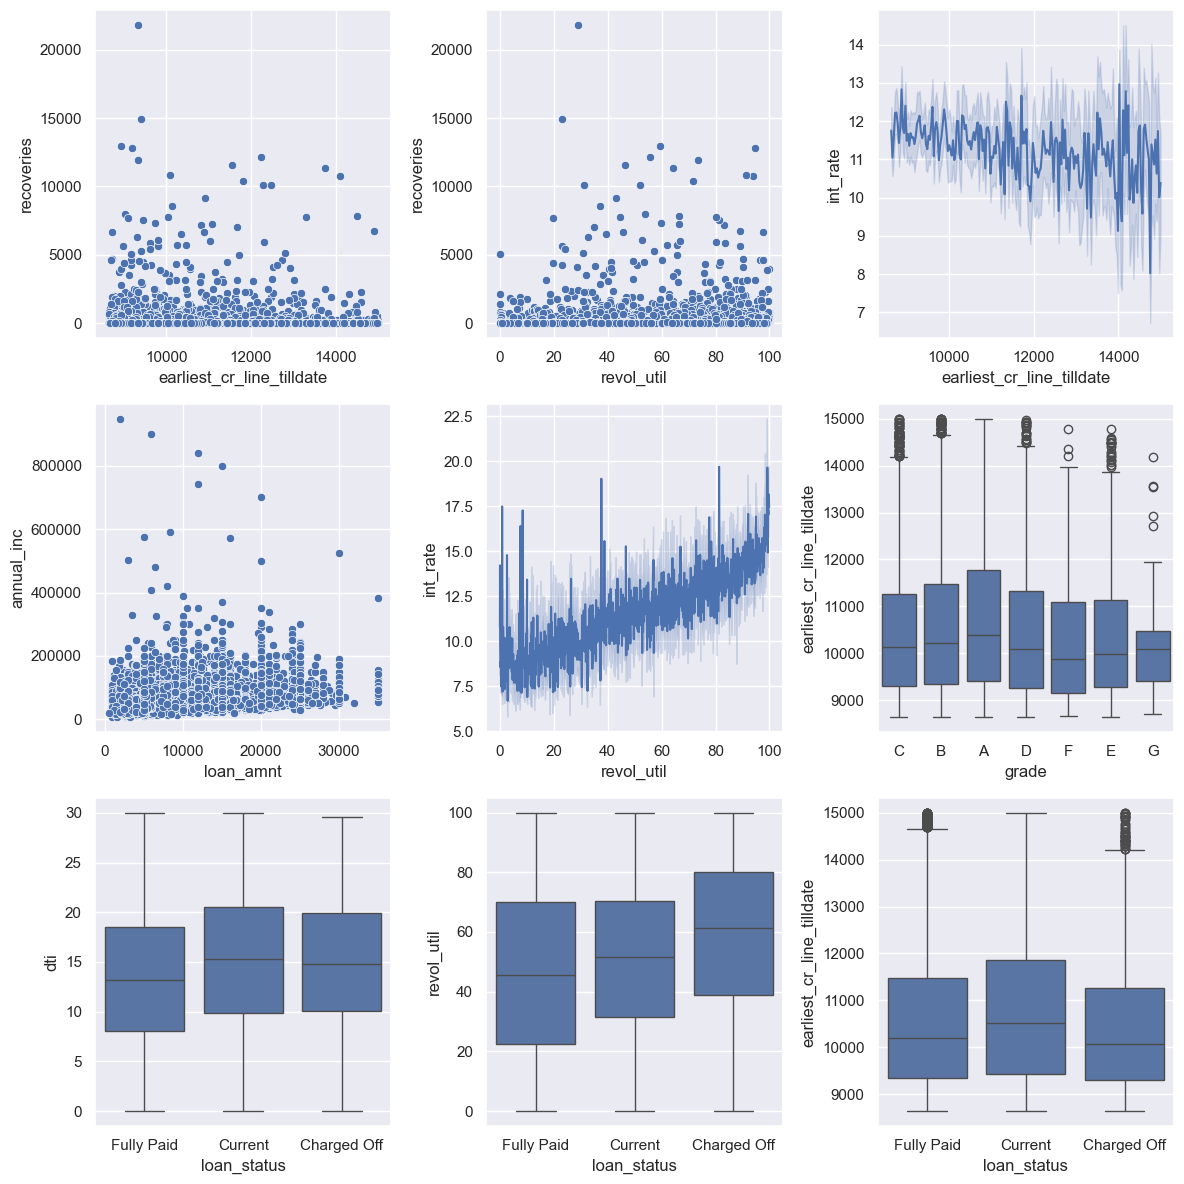

In [626]:


# Performing Univariate Analysis to find co-relation
fig, axs = plt.subplots(3,3, figsize = (12,12))
plt1 = sns.scatterplot(x=finalloandf["earliest_cr_line_tilldate"],y=finalloandf["recoveries"],ax = axs[0,0])
plt2 = sns.scatterplot(x=finalloandf["revol_util"],y=finalloandf["recoveries"],ax = axs[0,1])
plt3 = sns.lineplot(x=finalloandf["earliest_cr_line_tilldate"],y=finalloandf["int_rate"],ax = axs[0,2])
plt4 = sns.scatterplot(x=finalloandf["loan_amnt"],y=finalloandf["annual_inc"],ax = axs[1,0])
plt5 = sns.lineplot(x=finalloandf["revol_util"],y=finalloandf["int_rate"],ax = axs[1,1])
plt6 = sns.boxplot(x=finalloandf["grade"],y=finalloandf["earliest_cr_line_tilldate"],ax = axs[1,2])
plt7 = sns.boxplot(x=finalloandf["loan_status"],y=finalloandf["dti"],ax = axs[2,0])
plt8 = sns.boxplot(x=finalloandf["loan_status"],y=finalloandf["revol_util"],ax = axs[2,1])
plt9 = sns.boxplot(x=finalloandf["loan_status"],y=finalloandf["earliest_cr_line_tilldate"],ax = axs[2,2])

plt.tight_layout()

# Conclusion and Key Driving Factors for Loan Defaults: 

**The primary factors influencing loan defaults include:**

•	**Loan Grade:** Lower-grade loans (G, F, E, D) are more susceptible to defaults.\
•	**Loan Purpose:** Loans for small businesses, credit cards, and debt consolidation show higher default rates. \
•	**Revolving Utilization:** High revolving utilization rates significantly increase the risk of default. \
•	**Credit Line Age:** Newer credit lines are more frequently associated with charged-off loans. \
•	**Late Payments and Last Payment Amount:** These are indicators of financial distress or unwillingness to repay, which correlate with higher default rates. \
    **Recommendations for Risk Mitigation:**
•	**Enhanced Scrutiny for Certain Loans:** Loans falling into lower grades, or for purposes like small business, should be subjected to more rigorous evaluation. \
•	**Interest Rate Adjustments:** Consider adjusting interest rates based on revolving utilization and credit line age to mitigate risks. \
•	**Monitoring Late Payments:** Close monitoring of late fees and last payment amounts can provide early warning signs of potential defaults. \
By focusing on these driving factors, the company can better identify risky loan applicants and take appropriate actions to reduce credit losses, thereby enhancing profitability and stability in its lending operations. 
